## $Interaction$ $plot$: $Test$ $dimension$ $reduction$ $using$ $principal$ $components.$

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from skimage import data

## $Theory \ldots$

Let the original image $\mathbf{X} \in \mathbb{R}^{n \times m}$

In [5]:
X = data.camera()
print("Original image X has dimensions: {}".format(X.shape))

Original image X has dimensions: (512, 512)


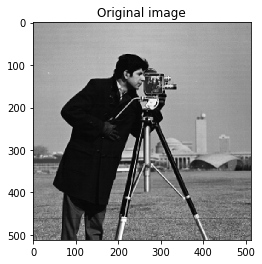

In [21]:
plt.imshow(X, cmap='gray')
plt.title('Original image');

Covariance matrix $ \mathbf{\Sigma}_X \in \mathbb{R}^{m \times m}$

In [22]:
cov = np.cov(X.T)
print("Dimension of covariance matrix : {}".format(cov.shape))

Dimension of covariance matrix : (512L, 512L)


Let $\mathbf{\Lambda} \in \mathbb{R}^{m \times m}$ be the diagonal matrix of eigenvalues and $\mathbf{V} \in \mathbb{R}^{m \times m}$ be the orthogonal matrix of eigenvectors.

Then, the eigendecomposition of $\mathbf{\Sigma_{X}} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^{-1}$

Since $\mathbf{\Sigma_{X}}$ is symmetric, a special case of eigendecomposition is $\mathbf{\Sigma_{X}} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T$

numpy's eigh function returns $\Lambda^\prime$ and $\mathbf{V}$ where $\Lambda^\prime \in \mathbb{R}^m$ are the diagonals of $\mathbf{\Lambda}$ 

In [23]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
print("Dimensions of eigenvectors: {}".format(eigenvectors.shape))
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:,::-1]

Dimensions of eigenvectors: (512L, 512L)


Eigenvectors are the principal component directions of $\mathbf{X}$. Projecting $\mathbf{X}$ on the principal component directions returns the principal components.

Linear transformation $\mathbf{P} = \mathbf{X} \mathbf{V}$ $\implies$ original image $\mathbf{X} = \mathbf{P} \mathbf{V}^T$

Define $\mathbf{X}^\prime := \mathbf{P}_r \mathbf{V}^T_r$ where $\mathbf{V}_r \in \mathbb{R}^{m \times r} \subset \mathbb{R}^{m \times m}$ is the reduced matrix restricted to the first $r$ eigenvectors and $\mathbf{P}_r \in \mathbb{R}^{r \times m} \subset \mathbb{R}^{m \times m}$.

In [24]:
P = X.dot(eigenvectors)
X_prime = P.dot(eigenvectors.T)

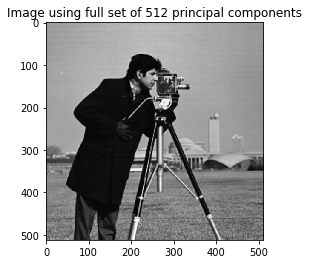

In [25]:
plt.imshow(X_prime, cmap='gray')
plt.title('Image using full set of 512 principal components');

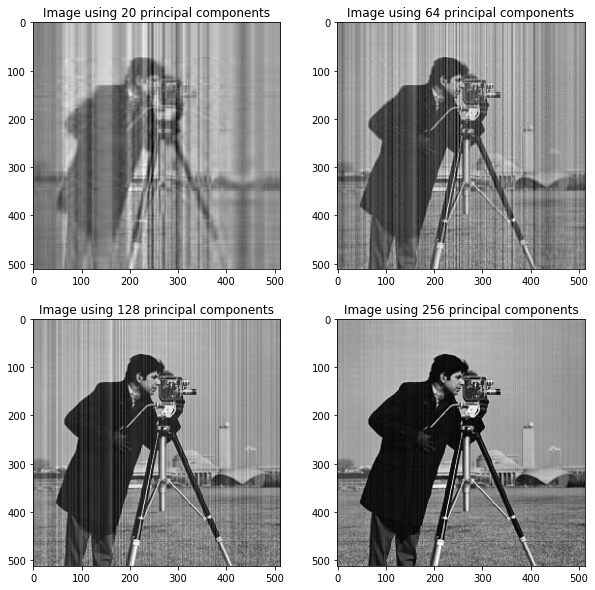

In [26]:
plt.figure(figsize=(10,10))

num_pc = [20, 64, 128, 256]

for idx, n in enumerate(num_pc):
    plt.subplot(2,2,idx+1)
    plt.imshow(P[:,:n-1].dot(eigenvectors[:,:n-1].T), cmap='gray')
    plt.title('Image using {} principal components'.format(n))

## $Comparison$ $with$ $scikit$-$learn$ $\ldots$

In [27]:
pca = PCA(n_components = len(cov))
transformation = pca.fit_transform(X)

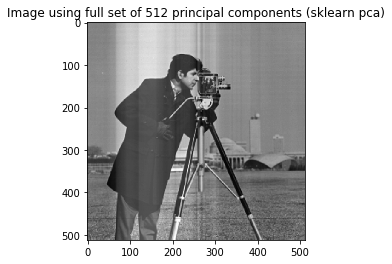

In [28]:
eigenvectors_sk = pca.components_
img_sk = transformation.dot(eigenvectors_sk)
plt.imshow(img_sk, cmap='gray')
plt.title('Image using full set of 512 principal components (sklearn pca)');

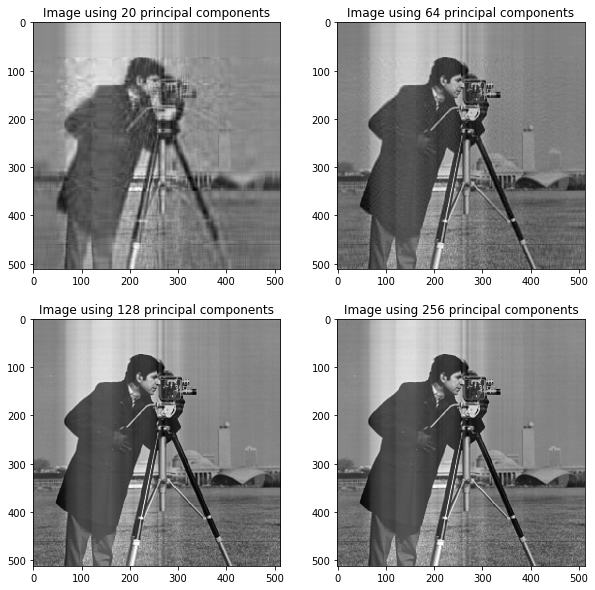

In [29]:
plt.figure(figsize=(10,10))

num_pc = [20, 64, 128, 256]

for idx, n in enumerate(num_pc):
    plt.subplot(2,2,idx+1)
    plt.imshow(transformation[:,:n-1].dot(eigenvectors_sk[:n-1,:]), cmap='gray')
    plt.title('Image using {} principal components'.format(n))

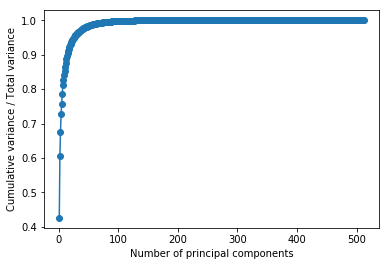

In [30]:
plt.xlabel('Number of principal components'), plt.ylabel('Cumulative variance / Total variance')
plt.plot(np.arange(1, len(cov)+1), np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_), marker='o');

In [31]:
summary_df = pd.DataFrame({'Eigenvalues':pca.explained_variance_}, index=np.arange(1, len(cov)+1))
summary_df['Proportion'] = summary_df/np.sum(summary_df)
summary_df['Cumulative'] = np.cumsum(summary_df['Proportion'])
summary_df.head(10)

,Eigenvalues,Proportion,Cumulative
1,628073.693334,0.425907,0.425907
2,264907.268211,0.179638,0.605545
3,103581.579431,0.070240,0.675785
4,75185.907338,0.050985,0.726770
5,46328.318577,0.031416,0.758186
6,41295.657689,0.028003,0.786190
7,36668.648797,0.024866,0.811055
8,22477.479666,0.015242,0.826297
9,21783.806441,0.014772,0.841069
10,18237.572677,0.012367,0.853437


## $Interaction \ldots$

In [17]:
import ipywidgets as widgets

In [6]:
def generate_img_with_x_pcs(x):
    plt.imshow(P[:,:x-1].dot(eigenvectors[:,:x-1].T), cmap='gray', aspect='auto')
    plt.title('Image using {} principal components'.format(x));
    return x

In [33]:
widgets.interact(generate_img_with_x_pcs, x=widgets.IntSlider(min=1, max=len(cov), step=10, value=100));

A Jupyter Widget